# Example PDE solutions for Math Methods III 
(part IA, NST and CompSci)

In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [2]:
myFontsize = 18
plt.rcParams['font.sans-serif'] =['Arial'] #Font type
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = myFontsize

yestex = True
if yestex :
    plt.rc('text', usetex=True)


## Steady-state temperature distribution

this is the solution of Laplace's equation in a rectangle with 3 homogeneous boundary conditions, with the 4th boundary condition phi(a,y) = y(b-y).

In [3]:
## this is the term that appears in the sum for the solution (n should be odd)
def termN(n,x,y,a,b) :
    result = np.sinh( n * np.pi * x/b)
    result *= np.sin( n * np.pi * y/b)
    result /= np.sinh( n * np.pi * a/b)
    result *= 8*b*b
    result /= (n*np.pi)**3
    return result

## here we add up N terms to approximate the solution
def sol(N,x,y,a,b) :
    result = 0
    for i in range(N):
        result += termN( 2*i+1 ,x,y,a,b)
    return result

## parameters a and b
aa = 1     
bb = 1.5
axesRange = 0,aa,0,bb   ## this is for plotting

## we are going to compute the solution on a grid
## of size nx by ny
nx=100
ny=100

## x and y co-ordinates of grid points
xx = np.linspace(0,aa,nx)
yy = np.linspace(0,bb,ny)

## how many terms to include in the sum for the solution
nMax = 10

## create a matrix to store the solution
phiXY = np.zeros((nx,ny))
## compute the solution at each point
for ix in range(nx) :
    for iy in range(ny):
        phiXY[ix,iy] = sol(nMax,xx[ix],yy[iy],aa,bb)
        
## plot
## NOTE : for this imshow function, phiXY[u,v], u ends up being the vertical co-ordinate 
##        and v the horizontal one so we have to take a transpose here
plt.imshow(np.transpose(phiXY), 
           cmap='coolwarm', origin='lower', extent=axesRange)
plt.colorbar()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.savefig('laplaceSol.pdf',bbox_inches='tight')
plt.show()

print('a =',aa,', b =',bb)

a = 1 , b = 1.5


## plot solution of wave equation
this is

$$ y = \sin(x) \sin(ct) + (1/3) \sin(3x) \sin (3ct) $$

for $0 < x < L$ with $L = \pi$, we also take $c = \pi$.

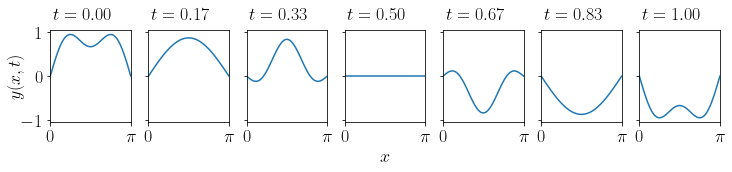

In [4]:
def waveSoln(x,t,LL,cc) :
    result =  np.sin(x*np.pi/LL) * np.cos(t*cc*np.pi/LL)
    result += (1/3.0) * np.sin(3*x*np.pi/LL) * np.cos(3*t*cc*np.pi/LL)
    return result

LL = np.pi    ## length of string
cc = np.pi  ## speed of wave

nx = 100  ## number of x-points to include in plot

nPlots = 7

scaleFactor = 1.5
fig = plt.figure(figsize=(8.0*scaleFactor,1.6*scaleFactor)) 
axs = fig.subplots(1,nPlots,sharey=True)
fig.subplots_adjust(wspace=0.22,top=0.8,bottom=0.27)

xVals = np.linspace(0,LL,nx)
tVals = np.linspace(0,1,nPlots)
#print(tVals)

for ii in range(nPlots):
    yVals = [ waveSoln(xx,tVals[ii],LL,cc) for xx in xVals ]
    axs[ii].plot(xVals,yVals)
    
axs[0].set_ylabel('$y(x,t)$',labelpad=-4)
axs[int(nPlots/2)].set_xlabel('$x$')

for ii,ax in enumerate(axs) :
    ax.set_xticks([0,LL],['$0$','$\pi$'])
    ax.set_xlim((0,LL))
    ax.text(0.1,1.3,'$t={:.2f}$'.format(tVals[ii]) )

plt.savefig('wave.pdf')
plt.show()

## Diffusion equation

Plot the solution for spreading on an infinite line

$$ \phi(x,t) =(1/2) \big[ 1 - \mathrm{erf}\big( x/\sqrt{4Dt}\big)  \big]$$


In [5]:
def erfSoln(x,t,DD) :
    result =  scipy.special.erf(x/np.sqrt(4*DD*t))
    result = 0.5 * ( 1 - result )
    return result

DD = 1.0    ## diffusion constant
LL = 15      ## we plot x from -LL to LL
tickVal = 10 ## labels for plot

tMin = 0.1  ## min time
tMax = 6    ## max time
                                
nx = 100  ## number of x-points to include in plot

nPlots = 4

scaleFactor = 1.5
fig = plt.figure(figsize=(5.0*scaleFactor,1.6*scaleFactor)) 
axs = fig.subplots(1,nPlots,sharey=True)
fig.subplots_adjust(wspace=0.22,top=0.8,bottom=0.27)

xVals = np.linspace(-LL,LL,nx)
tVals = np.linspace(0,tMax,nPlots)
tVals[0] = tMin ## make the first plot just after t=0
#print(tVals)

for ii in range(nPlots):
    yVals = [ erfSoln(xx,tVals[ii],DD) for xx in xVals ]
    axs[ii].plot(xVals,yVals)
    
axs[0].set_ylabel('$\phi(x,t)$',labelpad=-4)
axs[int(nPlots/2)].set_xlabel('$x$')

for ii,ax in enumerate(axs) :
    ax.set_xticks([-tickVal,0,tickVal])
    ax.set_xlim((-LL,LL))
    ax.text(-LL+0.1,1.15,'$t={:.2f}$'.format(tVals[ii]) )

plt.savefig('diffErf.pdf')
plt.show()

plot the spreading Gaussian solution

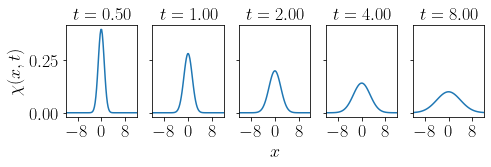

In [6]:
def gaussSoln(x,t,DD) :
    result =  np.exp(-x*x/(4*DD*t))
    result /= np.sqrt(4*np.pi*DD*t)
    return result

DD = 1.0    ## diffusion constant
LL = 12      ## we plot x from -LL to LL
tickVal = 8  ## labels for plots

tMin = 0.4  ## min time
tMax = 6    ## max time
                                
nx = 100  ## number of x-points to include in plot

xVals = np.linspace(-LL,LL,nx)
#tVals = np.linspace(0,tMax,nPlots)
#tVals[0] = tMin ## make the first plot just after t=0

tVals = [0.5,1.0,2.0,4.0,8.0]
nPlots = len(tVals)

scaleFactor = 1.5
fig = plt.figure(figsize=(5.0*scaleFactor,1.6*scaleFactor)) 
axs = fig.subplots(1,nPlots,sharey=True)
fig.subplots_adjust(wspace=0.22,top=0.8,bottom=0.27)


for ii in range(nPlots):
    yVals = [ gaussSoln(xx,tVals[ii],DD) for xx in xVals ]
    axs[ii].plot(xVals,yVals)
    
axs[0].set_ylabel('$\chi(x,t)$',labelpad=4)
axs[int(nPlots/2)].set_xlabel('$x$')

for ii,ax in enumerate(axs) :
    ax.set_xticks([-tickVal,0,tickVal])
    ax.set_xlim((-LL,LL))
    ax.text(0.1,1.07,'$t={:.2f}$'.format(tVals[ii]),
           transform=ax.transAxes)

plt.savefig('diffGauss.pdf')
plt.show()

plot the solution given in the notes for diffusion with an absorbing wall

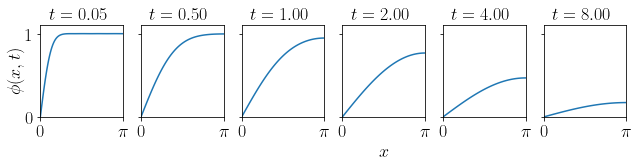

In [7]:
## this is the term that appears in the sum for the solution (n should be odd)
def termN(n,x,t,LL,DD) :
    result = np.sin( n * np.pi * x/ (2*LL) )
    result *= np.exp( - n*n * np.pi**2 * DD * t / (4*LL**2) )
    result *= 4 / (n*np.pi)
    return result

## here we add up N terms to approximate the solution
def sol(N,x,t,LL,DD) :
    result = 0
    for i in range(N):
        result += termN( 2*i+1 ,x,t,LL,DD)
    return result

NN = 10  ## terms to include
#t = 0.1
LL = np.pi  ## size L
DD = 1.0    ## diffusion constant D

nx = 100  ## numnber of x points

tVals = [0.05,0.5,1.0,2.0,4.0,8.0]
nPlots = len(tVals)

xx = np.linspace(0,LL,nx)

scaleFactor = 1.5
fig = plt.figure(figsize=(7.0*scaleFactor,1.6*scaleFactor)) 
axs = fig.subplots(1,nPlots,sharey=True)
fig.subplots_adjust(wspace=0.22,top=0.8,bottom=0.27)

for ii,ax in enumerate(axs):
    ax.plot(xx,[ sol(NN,x,tVals[ii],LL,DD) for x in xx ])

for ii,ax in enumerate(axs) :
    ax.set_xticks([0,LL],['0','$\pi$'])
    ax.set_xlim((0,LL))
    ax.set_ylim((0,1.1))
    ax.text(0.1,1.07,'$t={:.2f}$'.format(tVals[ii]),
           transform=ax.transAxes)

axs[0].set_ylabel('$\phi(x,t)$',labelpad=0)
axs[int(nPlots/2)].set_xlabel('$x$')

plt.savefig('diffSep.pdf')
plt.show()